In [1]:
from pathlib import Path
import tensorflow as tf

from split import get_dataset

In [2]:
data_root = 'data/'
batch_size = 32
# Load data
trainset, valset, testset = get_dataset(data_root, batch_size)

model definition：

base_model = tf.keras.applications.resnet_v2.ResNet50V2(input_shape=(224, 224, 3), 
                                                              include_top=False)
base_model.trainable = False # 冻结 base 层

model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=1,activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=2,activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=1,activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.summary()

Model compile and train：

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    trainset,
    epochs=10,
    validation_data=valset,
    validation_steps=10
)

Epoch 1/10
195/195 [==============================] - 102s 524ms/step - loss: 0.1020 - accuracy: 0.9529 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 2/10
195/195 [==============================] - 97s 499ms/step - loss: 0.0062 - accuracy: 0.9974 - val_loss: 0.0076 - val_accuracy: 0.9937
Epoch 3/10
195/195 [==============================] - 93s 478ms/step - loss: 2.3950e-04 - accuracy: 1.0000 - val_loss: 4.7514e-04 - val_accuracy: 1.0000
Epoch 4/10
195/195 [==============================] - 94s 482ms/step - loss: 5.7865e-05 - accuracy: 1.0000 - val_loss: 3.4963e-05 - val_accuracy: 1.0000
Epoch 5/10
195/195 [==============================] - 92s 473ms/step - loss: 1.5204e-05 - accuracy: 1.0000 - val_loss: 6.7695e-05 - val_accuracy: 1.0000
Epoch 6/10
195/195 [==============================] - 92s 474ms/step - loss: 9.6587e-06 - accuracy: 1.0000 - val_loss: 8.2849e-05 - val_accuracy: 1.0000
Epoch 7/10
195/195 [==============================] - 95s 489ms/step - loss: 6.5725e-06 - accurac

Visualization：

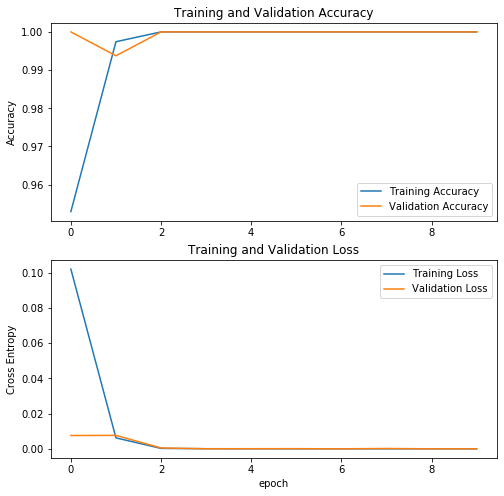

In [7]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Evaluation and prediction

In [8]:
loss, accuracy = model.evaluate(testset)


195/195 [==============================] - 72s 371ms/step - loss: 0.0035 - accuracy: 0.9986
Test accuracy : 0.9985544681549072


In [17]:
print(f'Test accuracy : {accuracy}, loss {loss}', )

Test accuracy : 0.9985544681549072, loss 0.003493397030979395


In [28]:
len(testset) * batch_size

6240

In [27]:
k = 0
for batch in testset:
    k += len(batch[1])
k

6226

In [ ]:
0.9990363121032715, loss 0.003378412453457713